In [3]:
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns

## TEIS BDI-3 Analysis

[The Tennessee Early Intervention System (TEIS)](https://www.tn.gov/didd/for-consumers/tennessee-early-intervention-system-teis.html) is a voluntary program that offers therapy and other services to families of infants and young children with developmental delays or disabilities. Services are provided at no cost to families. TEIS is critically important to supporting the development of Tennessee children with disabilities and developmental delays as they prepare for school.

In this project, you are going to be working with data gathered from the Battelle Developmental Inventory, Third Edition (BDI-3) Eligibility Evaluation, an early childhood instrument based on the concept of developmental milestones. The BDI-3 is used by TEIS for determining eligibility and outcomes. This assessment tool has been in use for less than a year now, so the purpose of your work is to analyze the scores to see if there appear to be any weaknesses in this tool in any of the assessed domains or subdomains.

The BDI-3 is divided into 5 domains, each of which has 2 or 3 subdomains. On each domain and subdomain, a child receives several different scores. An example score report is available in the BDI3_ScoreReport.pdf file. See page 3 of this file for a detailed description of each score. Note that the BDI-3 is norm-based, meaning that the scores are generated by the child's performance based on the performance of same-aged peers on the same items. 

Some notes about the data:
* The same instrument is used for determining eligibility and outcomes. The type of evaluation can be determined from the "Program Label" column, which will indicate either an eligibility evaluation, an annual evaluation, or a birthday/milestone or exit evaluation. 
* Some of the rows are duplicated, so be sure to check that in your initial data inspection and cleaning. In addition, some children will have multiple rows in the dataset. A child is evaluated at initial eligibility, annually, and at their 3rd birthday or exit under certain circumstances. The evaluation may be repeated every 4 months (e.g. a child was ineligible and re-referred). 
* There are many records that are missing ID numbers. These records have been given a unique identifier which starts with "SP" so that they can be identified.
* When reading the data in, you may notice that some of the values in the RDI columns are incorrectly converted to dates. It is likely that this happens whenever the numerator of the fraction is 12 or less.

#### Exploratory Data Analysis

Reading in the Excel file.

In [4]:
dataset = pd.read_excel(r"C:\Users\mgood\Documents\nss_data_analytics\projects\teis-concat-dog\data\all_evals.xlsx")

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23944 entries, 0 to 23943
Columns: 219 entries, Child ID to Code 10
dtypes: datetime64[ns](14), float64(79), object(126)
memory usage: 40.0+ MB


Dropping duplicates. See below, we go from 23,947 entries in `dataset` 19,500 entries in `dataset_clean`.

In [6]:
dataset_clean = dataset.drop_duplicates()

In [7]:
dataset_clean.columns = dataset_clean.columns.str.replace(' ', '_')

In [8]:
dataset_clean.columns = dataset_clean.columns.str.replace('-', '_')

In [9]:
dataset_clean.columns = dataset_clean.columns.str.replace('__', '_')

Dropping cases with no data below.

In [10]:
check_columns = ['Adaptive_Sum_of_Scaled_Scores', 'Social_Emotional_Sum_of_Scaled_Scores', 'Communication_Sum_of_Scaled_Scores', 'Motor_Sum_of_Scaled_Scores', 'Cognitive_Sum_of_Scaled_Scores']

In [11]:
dataset_clean.dropna(subset=check_columns, how='all', inplace=True)

C:\Users\mgood\AppData\Local\Temp\ipykernel_7092\2153370628.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_clean.dropna(subset=check_columns, how='all', inplace=True)


Running `.info()` to see we have 19,497 rows.

In [12]:
dataset_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19497 entries, 0 to 23943
Columns: 219 entries, Child_ID to Code_10
dtypes: datetime64[ns](14), float64(79), object(126)
memory usage: 32.7+ MB


Checking program size. Probably want to run this later with a completely clean dataset as well.

In [13]:
dataset_clean.groupby(dataset_clean['Program_Label']).size()

Program_Label
BDI-3 Annual Evaluation                6904
BDI-3 Eligibility Evaluation          12390
BDI-3 Milestone or Exit Evaluation      203
dtype: int64

### concat(dog)'s analysis

7. Is there any notable pattern of scoring by region? Note: TEIS contracts with three agencies for evaluations (one per grand region) as follows:  
* East TN, First TN and Southeast
* Greater Nashville, Upper Cumberland, and South Central
* Northwest, Southwest, and Memphis Delta

Checking on count by sex.

In [14]:
dataset_clean.groupby(dataset_clean['Gender']).size()

Gender
F     7246
M    11957
U      294
dtype: int64

There are 87 entries with no sublocation - insignificant enough number that we can drop it later

In [15]:
dataset_clean[dataset_clean['Location__Sub_Level_1'].isnull()]

,Child_ID,Gender,Date_of_Birth,Location__Sub_Level_1,Program_Label,Adaptive_Sum_of_Scaled_Scores,Adaptive_Developmental_Quotient,Adaptive_Percentile_Rank,Adaptive_95%_Confidence_Interval,Adaptive_RDI,...,Code_1,Code_2,Code_3,Code_4,Code_5,Code_6,Code_7,Code_8,Code_9,Code_10
117,481875,M,2020-04-22,NaN,BDI-3 Annual Evaluation,19.0,97.0,42,90-104,82/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,484037,M,2019-12-03,NaN,BDI-3 Annual Evaluation,3.0,49.0,<0.1,45-59,1990-03-01 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
237,485687,F,2020-05-17,NaN,BDI-3 Annual Evaluation,8.0,64.0,1,59-73,18/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
318,487138,F,2020-06-28,NaN,BDI-3 Annual Evaluation,27.0,121.0,92,113-127,97/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
581,491452,M,2020-05-22,NaN,BDI-3 Annual Evaluation,22.0,106.0,66,99-113,93/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22548,SP01896,F,2020-09-07,NaN,BDI-3 Annual Evaluation,28.0,124.0,95,116-130,98/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22556,SP01904,M,2020-06-06,NaN,BDI-3 Annual Evaluation,17.0,91.0,27,85-99,73/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22582,SP01930,M,2020-06-10,NaN,BDI-3 Annual Evaluation,24.0,112.0,79,104-118,96/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22592,SP01940,M,2021-09-22,NaN,BDI-3 Annual Evaluation,9.0,95.0,37,86-106,87/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Grouping locations to three main regions of TN

In [16]:
location_groups = {
    'East Tennessee': 'East',
    'First Tennessee': 'East',
    'Southeast Tennessee': 'East',
    'Greater Nashville': 'Middle TN',
    'Upper Cumberland': 'Middle TN',
    'South Central': 'Middle TN',
    'Northwest': 'West',
    'Southwest': 'West',
    'Memphis Delta': 'West'
}


dataset_clean['Location_Group'] = dataset_clean['Location__Sub_Level_1'].map(location_groups)


dataset_clean['Location_Group'].fillna('Other', inplace=True)

C:\Users\mgood\AppData\Local\Temp\ipykernel_7092\581902080.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_clean['Location_Group'] = dataset_clean['Location__Sub_Level_1'].map(location_groups)
C:\Users\mgood\AppData\Local\Temp\ipykernel_7092\581902080.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_clean['Location_Group'].fillna('Other', inplace=True)


Below I've done some analysis that probably belongs a little later in the notebook :)

In [17]:
dataset_clean.groupby(dataset_clean['Location__Sub_Level_1']).size()

Location__Sub_Level_1
East Tennessee         3340
First Tennessee        1701
Greater Nashville      3435
Memphis Delta          2715
Northwest               955
South Central          2560
Southeast Tennessee    1583
Southwest              1100
Upper Cumberland       2021
dtype: int64

Dropping rows with no location data

In [18]:
location_check = ['Location__Sub_Level_1']

In [19]:
dataset_clean.dropna(subset=location_check,how='all', inplace=True)

C:\Users\mgood\AppData\Local\Temp\ipykernel_7092\2506459002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_clean.dropna(subset=location_check,how='all', inplace=True)


After dropping the 87 rows, we have 19,410 entries in `dataset_clean`

In [20]:
dataset_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19410 entries, 0 to 23943
Columns: 220 entries, Child_ID to Location_Group
dtypes: datetime64[ns](14), float64(79), object(127)
memory usage: 32.7+ MB


Sean's code: filter for all percentile rank columns to get basic stats by group

In [21]:
# filter for all PR columns
pr_columns = [col for col in dataset_clean.columns if 'PR' in col]


for col in pr_columns:
    dataset_clean[col] = pd.to_numeric(dataset_clean[col], errors='coerce')


location_grouped_data = dataset_clean.groupby('Location_Group')


pr_stats = {col: location_grouped_data[col].agg(['mean', 'median', 'std', 'count', 'min', 'max']) for col in pr_columns}


for col, stats in pr_stats.items():
    print(f"Statistics for {col}:\n", stats, "\n")


Statistics for Adaptive_Self_Care_PR:
                      mean  median        std  count  min   max
Location_Group                                                
East            30.128285    25.0  24.909779   6127  1.0  99.0
Middle TN       29.599756    25.0  24.994755   7383  1.0  99.0
West            30.855980    25.0  25.947653   4423  1.0  99.0 

Statistics for Adaptive_Personal_Responsibility_PR:
                      mean  median        std  count  min   max
Location_Group                                                
East            33.909190    25.0  28.008053   2753  1.0  99.0
Middle TN       40.886159    37.0  31.399522   3663  1.0  99.0
West            38.977138    37.0  29.787467   2187  1.0  99.0 

Statistics for Social_Emotional_Adult_Interaction_PR:
                      mean  median        std  count  min   max
Location_Group                                                
East            53.181037    50.0  25.771027   6518  1.0  99.0
Middle TN       55.158943    6

C:\Users\mgood\AppData\Local\Temp\ipykernel_7092\1757028541.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_clean[col] = pd.to_numeric(dataset_clean[col], errors='coerce')


Compute stats and filter for columns 6-160

In [22]:
dataset_clean.head()

,Child_ID,Gender,Date_of_Birth,Location__Sub_Level_1,Program_Label,Adaptive_Sum_of_Scaled_Scores,Adaptive_Developmental_Quotient,Adaptive_Percentile_Rank,Adaptive_95%_Confidence_Interval,Adaptive_RDI,...,Code_2,Code_3,Code_4,Code_5,Code_6,Code_7,Code_8,Code_9,Code_10,Location_Group
0,44879,F,2022-09-27,Southwest,BDI-3 Eligibility Evaluation,7.0,85.0,16,77-97,39/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West
1,47795,F,2020-12-23,Greater Nashville,BDI-3 Eligibility Evaluation,16.0,88.0,21,82-96,79/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Middle TN
2,54340,M,2021-06-22,First Tennessee,BDI-3 Eligibility Evaluation,8.0,90.0,25,81-101,77/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,East
3,54344,F,2022-03-07,Southeast Tennessee,BDI-3 Eligibility Evaluation,13.0,115.0,84,103-123,99/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,East
4,54515,M,2021-11-04,Memphis Delta,BDI-3 Eligibility Evaluation,5.0,75.0,5,68-88,1990-09-01 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West


Creating an `age_at_test_years` and an `age_at_test_days` column

In [23]:
dataset_clean['age_at_test_years'] = (dataset_clean['Adaptive_Self_Care_Date_of_Testing'].dt.year - dataset_clean['Date_of_Birth'].dt.year)

C:\Users\mgood\AppData\Local\Temp\ipykernel_7092\1365880338.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_clean['age_at_test_years'] = (dataset_clean['Adaptive_Self_Care_Date_of_Testing'].dt.year - dataset_clean['Date_of_Birth'].dt.year)


In [24]:
dataset_clean['age_at_test_days'] = (dataset_clean['Adaptive_Self_Care_Date_of_Testing'] - dataset_clean['Date_of_Birth'])

C:\Users\mgood\AppData\Local\Temp\ipykernel_7092\1242800640.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_clean['age_at_test_days'] = (dataset_clean['Adaptive_Self_Care_Date_of_Testing'] - dataset_clean['Date_of_Birth'])


In [25]:
dataset_clean.head()

,Child_ID,Gender,Date_of_Birth,Location__Sub_Level_1,Program_Label,Adaptive_Sum_of_Scaled_Scores,Adaptive_Developmental_Quotient,Adaptive_Percentile_Rank,Adaptive_95%_Confidence_Interval,Adaptive_RDI,...,Code_4,Code_5,Code_6,Code_7,Code_8,Code_9,Code_10,Location_Group,age_at_test_years,age_at_test_days
0,44879,F,2022-09-27,Southwest,BDI-3 Eligibility Evaluation,7.0,85.0,16,77-97,39/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West,1.0,269 days
1,47795,F,2020-12-23,Greater Nashville,BDI-3 Eligibility Evaluation,16.0,88.0,21,82-96,79/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Middle TN,3.0,818 days
2,54340,M,2021-06-22,First Tennessee,BDI-3 Eligibility Evaluation,8.0,90.0,25,81-101,77/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,East,2.0,653 days
3,54344,F,2022-03-07,Southeast Tennessee,BDI-3 Eligibility Evaluation,13.0,115.0,84,103-123,99/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,East,1.0,353 days
4,54515,M,2021-11-04,Memphis Delta,BDI-3 Eligibility Evaluation,5.0,75.0,5,68-88,1990-09-01 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West,2.0,477 days


Replace missing with NaN

In [26]:
dataset_clean.replace('', pd.NA, inplace=True)

C:\Users\mgood\AppData\Local\Temp\ipykernel_7092\1357420498.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_clean.replace('', pd.NA, inplace=True)


Drop cases with no scores

In [27]:
check_columns = ['Adaptive_Sum_of_Scaled_Scores', 'Social_Emotional_Sum_of_Scaled_Scores', 'Communication_Sum_of_Scaled_Scores', 'Motor_Sum_of_Scaled_Scores', 'Cognitive_Sum_of_Scaled_Scores']

dataset_clean.dropna(subset=check_columns, how='all', inplace=True)

C:\Users\mgood\AppData\Local\Temp\ipykernel_7092\22393909.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_clean.dropna(subset=check_columns, how='all', inplace=True)


Create single test-date column

In [28]:
dataset_clean['test_date'] = dataset_clean['Adaptive_Self_Care_Date_of_Testing']

C:\Users\mgood\AppData\Local\Temp\ipykernel_7092\185617121.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_clean['test_date'] = dataset_clean['Adaptive_Self_Care_Date_of_Testing']


Check for missing test dates

In [29]:
date_nan = 'test_date'
rows_with_nan_test_date = dataset_clean[dataset_clean[date_nan].isna()]

Assign test date where missing

In [30]:
dataset_clean.at[13301,'test_date']= pd.to_datetime('2023-08-21')

dataset_clean.at[14721,'test_date'] = pd.to_datetime('2023-05-09')

dataset_clean.at[23271,'test_date']= pd.to_datetime('2023-07-17')

In [31]:
dataset_clean.head()

,Child_ID,Gender,Date_of_Birth,Location__Sub_Level_1,Program_Label,Adaptive_Sum_of_Scaled_Scores,Adaptive_Developmental_Quotient,Adaptive_Percentile_Rank,Adaptive_95%_Confidence_Interval,Adaptive_RDI,...,Code_5,Code_6,Code_7,Code_8,Code_9,Code_10,Location_Group,age_at_test_years,age_at_test_days,test_date
0,44879,F,2022-09-27,Southwest,BDI-3 Eligibility Evaluation,7.0,85.0,16,77-97,39/90,...,NaN,NaN,NaN,NaN,NaN,NaN,West,1.0,269 days,2023-06-23
1,47795,F,2020-12-23,Greater Nashville,BDI-3 Eligibility Evaluation,16.0,88.0,21,82-96,79/90,...,NaN,NaN,NaN,NaN,NaN,NaN,Middle TN,3.0,818 days,2023-03-21
2,54340,M,2021-06-22,First Tennessee,BDI-3 Eligibility Evaluation,8.0,90.0,25,81-101,77/90,...,NaN,NaN,NaN,NaN,NaN,NaN,East,2.0,653 days,2023-04-06
3,54344,F,2022-03-07,Southeast Tennessee,BDI-3 Eligibility Evaluation,13.0,115.0,84,103-123,99/90,...,NaN,NaN,NaN,NaN,NaN,NaN,East,1.0,353 days,2023-02-23
4,54515,M,2021-11-04,Memphis Delta,BDI-3 Eligibility Evaluation,5.0,75.0,5,68-88,1990-09-01 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,West,2.0,477 days,2023-02-24


In [32]:
dataset_clean['Adaptive_PR'] = dataset_clean['Adaptive_Percentile_Rank']
dataset_clean['Social_Emotional_PR'] = dataset_clean['Social_Emotional_Percentile_Rank']
dataset_clean['Communication_PR'] = dataset_clean['Communication_Percentile_Rank']
dataset_clean['Motor_PR'] = dataset_clean['Motor_Percentile_Rank']
dataset_clean['Cognitive_PR'] = dataset_clean['Cognitive_Percentile_Rank']

C:\Users\mgood\AppData\Local\Temp\ipykernel_7092\1359340981.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_clean['Adaptive_PR'] = dataset_clean['Adaptive_Percentile_Rank']
C:\Users\mgood\AppData\Local\Temp\ipykernel_7092\1359340981.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_clean['Social_Emotional_PR'] = dataset_clean['Social_Emotional_Percentile_Rank']
C:\Users\mgood\AppData\Local\Temp\ipykernel_7092\1359340981.py:3: SettingWithCopyWarning: 
A value is trying to be set on a co

In [33]:
percentile_columns = ['Adaptive_Percentile_Rank','Social_Emotional_Percentile_Rank','Communication_Percentile_Rank','Motor_Percentile_Rank','Cognitive_Percentile_Rank']

In [34]:
dataset_clean[percentile_columns] = dataset_clean[percentile_columns].replace('<0.1', '0.1')

C:\Users\mgood\AppData\Local\Temp\ipykernel_7092\3427518723.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_clean[percentile_columns] = dataset_clean[percentile_columns].replace('<0.1', '0.1')


Isolate to Eligibility Assessment (condition can be updated for other assessment types)

In [35]:
dataset_clean_eligibility = dataset_clean[dataset_clean["Program_Label"] == 'BDI-3 Eligibility Evaluation']

In [36]:
dataset_clean_eligibility.head()

,Child_ID,Gender,Date_of_Birth,Location__Sub_Level_1,Program_Label,Adaptive_Sum_of_Scaled_Scores,Adaptive_Developmental_Quotient,Adaptive_Percentile_Rank,Adaptive_95%_Confidence_Interval,Adaptive_RDI,...,Code_10,Location_Group,age_at_test_years,age_at_test_days,test_date,Adaptive_PR,Social_Emotional_PR,Communication_PR,Motor_PR,Cognitive_PR
0,44879,F,2022-09-27,Southwest,BDI-3 Eligibility Evaluation,7.0,85.0,16,77-97,39/90,...,NaN,West,1.0,269 days,2023-06-23,16,96,27,21,50
1,47795,F,2020-12-23,Greater Nashville,BDI-3 Eligibility Evaluation,16.0,88.0,21,82-96,79/90,...,NaN,Middle TN,3.0,818 days,2023-03-21,21,61,42,55,50
2,54340,M,2021-06-22,First Tennessee,BDI-3 Eligibility Evaluation,8.0,90.0,25,81-101,77/90,...,NaN,East,2.0,653 days,2023-04-06,25,27,12,73,13
3,54344,F,2022-03-07,Southeast Tennessee,BDI-3 Eligibility Evaluation,13.0,115.0,84,103-123,99/90,...,NaN,East,1.0,353 days,2023-02-23,84,58,21,27,81
4,54515,M,2021-11-04,Memphis Delta,BDI-3 Eligibility Evaluation,5.0,75.0,5,68-88,1990-09-01 00:00:00,...,NaN,West,2.0,477 days,2023-02-24,5,4,2,4,42


These are all object data types, so converting below to numeric.

In [37]:
dataset_clean_eligibility[percentile_columns] = dataset_clean_eligibility[percentile_columns].apply(pd.to_numeric, errors='coerce')


C:\Users\mgood\AppData\Local\Temp\ipykernel_7092\1315868077.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_clean_eligibility[percentile_columns] = dataset_clean_eligibility[percentile_columns].apply(pd.to_numeric, errors='coerce')


Group by region for percentile rank

In [38]:
dataset_clean_eligibility.groupby('Location_Group')[percentile_columns].mean()

,Adaptive_Percentile_Rank,Social_Emotional_Percentile_Rank,Communication_Percentile_Rank,Motor_Percentile_Rank,Cognitive_Percentile_Rank
Location_Group,,,,,
East,31.071587,38.641734,24.798738,43.295641,36.158367
Middle TN,31.517061,40.871186,20.430411,42.772248,32.287722
West,33.943533,49.182707,23.726475,48.371451,35.567066


Group by sub location for percentile rank

In [39]:
dataset_clean_eligibility.groupby('Location__Sub_Level_1')[percentile_columns].mean()

,Adaptive_Percentile_Rank,Social_Emotional_Percentile_Rank,Communication_Percentile_Rank,Motor_Percentile_Rank,Cognitive_Percentile_Rank
Location__Sub_Level_1,,,,,
East Tennessee,31.484654,37.735285,25.060979,43.270888,35.096214
First Tennessee,28.577593,33.553950,25.531733,41.727622,35.414241
Greater Nashville,32.691719,46.406488,22.237369,45.240411,36.962353
Memphis Delta,29.713649,46.091690,20.675606,45.056192,33.208090
Northwest,40.317810,54.963889,29.370588,52.441667,40.340033
South Central,30.815045,36.141885,17.701134,39.607339,27.237851
Southeast Tennessee,32.618829,45.168683,23.605664,44.818164,38.909561
Southwest,39.051012,51.991216,26.541835,53.139136,37.409447
Upper Cumberland,30.126320,36.351109,20.650639,42.280136,29.984072


Create developmental quotient columns list

In [40]:
dq_columns = ['Adaptive_Developmental_Quotient','Social_Emotional_Developmental_Quotient','Communication_Developmental_Quotient','Motor_Developmental_Quotient','Cognitive_Developmental_Quotient']

Group by region and age for developmental quotient

In [44]:
dataset_clean_eligibility.groupby(['age_at_test_years','Location_Group'])[dq_columns].mean()
# can add .to_clipboard() to the end of this statement to copy and paste it elsewhere!

Adaptive_Developmental_Quotient  \
age_at_test_years Location_Group                                    
0.0               East                                  92.456724   
                  Middle TN                             93.703939   
                  West                                  96.505906   
1.0               East                                  90.383683   
                  Middle TN                             90.068120   
                  West                                  92.563510   
2.0               East                                  86.398974   
                  Middle TN                             88.426754   
                  West                                  88.131559   
3.0               East                                  84.196682   
                  Middle TN                             83.170213   
                  West                                  85.598753   

                                  Social_Emotional_Developmental_Quotient  \
age_at_test_years Location_Group                                            
0.0               East                                          94.876000   
                  Middle TN                                     96.504447   
                  West                                         101.228346   
1.0               East                                          97.746968   
                  Middle TN                                     99.683243   
                  West                                         103.412240   
2.0               East                                          90.648909   
                  Middle TN                                     92.442105   
                  West                                          97.711027   
3.0               East                                          89.682464   
                  Middle TN                                     89.184659   
                  West                                          92.760915   

                                  Communication_Developmental_Quotient  \
age_at_test_years Location_Group                                         
0.0               East                                       98.465863   
                  Middle TN                                  96.403061   
                  West                                      102.449704   
1.0               East                                       87.033981   
                  Middle TN                                  85.660982   
                  West                                       87.560046   
2.0               East                                       74.130295   
                  Middle TN                                  72.936842   
                  West                                       73.273764   
3.0               East                                       73.570071   
                  Middle TN                                  70.910638   
                  West                                       72.207900   

                                  Motor_Developmental_Quotient  \
age_at_test_years Location_Group                                 
0.0               East                               97.896000   
                  Middle TN                          98.360510   
                  West                               99.875984   
1.0               East                               93.670170   
                  Middle TN                          92.699387   
                  West                               96.251732   
2.0               East                               97.409499   
                  Middle TN                          97.769433   
                  West                              100.392395   
3.0               East                               95.652482   
                  Middle TN                          92.237892   
                  West                               96.326403   

                          

Group by sub location and age for developmental quotient

In [47]:
dataset_clean_eligibility.groupby(['age_at_test_years','Location_Group'])[dq_columns].mean()

Adaptive_Developmental_Quotient  \
age_at_test_years Location_Group                                    
0.0               East                                  92.456724   
                  Middle TN                             93.703939   
                  West                                  96.505906   
1.0               East                                  90.383683   
                  Middle TN                             90.068120   
                  West                                  92.563510   
2.0               East                                  86.398974   
                  Middle TN                             88.426754   
                  West                                  88.131559   
3.0               East                                  84.196682   
                  Middle TN                             83.170213   
                  West                                  85.598753   

                                  Social_Emotional_Developmental_Quotient  \
age_at_test_years Location_Group                                            
0.0               East                                          94.876000   
                  Middle TN                                     96.504447   
                  West                                         101.228346   
1.0               East                                          97.746968   
                  Middle TN                                     99.683243   
                  West                                         103.412240   
2.0               East                                          90.648909   
                  Middle TN                                     92.442105   
                  West                                          97.711027   
3.0               East                                          89.682464   
                  Middle TN                                     89.184659   
                  West                                          92.760915   

                                  Communication_Developmental_Quotient  \
age_at_test_years Location_Group                                         
0.0               East                                       98.465863   
                  Middle TN                                  96.403061   
                  West                                      102.449704   
1.0               East                                       87.033981   
                  Middle TN                                  85.660982   
                  West                                       87.560046   
2.0               East                                       74.130295   
                  Middle TN                                  72.936842   
                  West                                       73.273764   
3.0               East                                       73.570071   
                  Middle TN                                  70.910638   
                  West                                       72.207900   

                                  Motor_Developmental_Quotient  \
age_at_test_years Location_Group                                 
0.0               East                               97.896000   
                  Middle TN                          98.360510   
                  West                               99.875984   
1.0               East                               93.670170   
                  Middle TN                          92.699387   
                  West                               96.251732   
2.0               East                               97.409499   
                  Middle TN                          97.769433   
                  West                              100.392395   
3.0               East                               95.652482   
                  Middle TN                          92.237892   
                  West                               96.326403   

                          

Create a dataframe for a clustered bar chart for percentile rank by region

In [51]:
pr_by_region2_data = {'Region' : ['East','East','East','East','East','Middle TN','Middle TN','Middle TN','Middle TN','Middle TN','Other','Other','Other','Other','Other','West','West','West','West','West'],
                      'Domain' : ['Adaptive','Social Emotional','Communication','Motor','Cognitive','Adaptive','Social Emotional','Communication','Motor','Cognitive','Adaptive','Social Emotional','Communication','Motor','Cognitive','Adaptive','Social Emotional','Communication','Motor','Cognitive'],
                      'Percentile Rank' : [31.071587,38.641734,24.798738,43.295641,36.158367,31.517061,40.871186,20.430411,42.772248,32.287722,46.166667,44.183333,8.025000,27.750000,33.550000,33.943533,49.182707,23.726475,48.371451,35.567066]}
pr_by_region2 = pd.DataFrame(pr_by_region2_data)

In [52]:
pr_by_region2

,Region,Domain,Percentile Rank
0,East,Adaptive,31.071587
1,East,Social Emotional,38.641734
2,East,Communication,24.798738
3,East,Motor,43.295641
4,East,Cognitive,36.158367
5,Middle TN,Adaptive,31.517061
6,Middle TN,Social Emotional,40.871186
7,Middle TN,Communication,20.430411
8,Middle TN,Motor,42.772248
9,Middle TN,Cognitive,32.287722


Text(0.5, 1.0, 'Average Percentile Rank by Region')

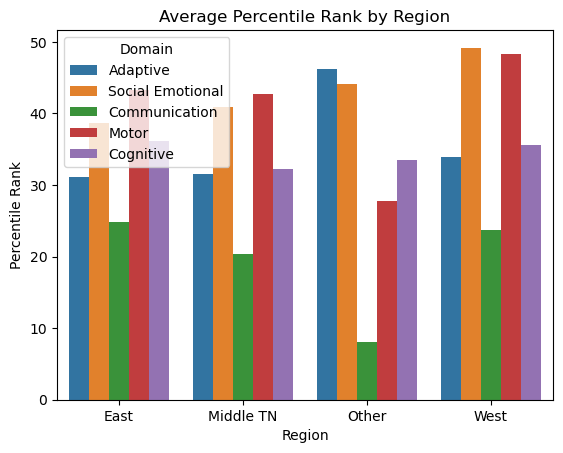

In [53]:
sns.barplot(hue='Domain',y='Percentile Rank',x='Region',data=pr_by_region2)
plt.title("Average Percentile Rank by Region")

In [76]:
dataset_clean.groupby(dataset_clean['Location__Sub_Level_1']).size()

Location__Sub_Level_1
East Tennessee         3340
First Tennessee        1701
Greater Nashville      3435
Memphis Delta          2715
Northwest               955
South Central          2560
Southeast Tennessee    1583
Southwest              1100
Upper Cumberland       2021
dtype: int64

Using Rushi's code from earlier as a reference to create a new df for the locations by evaluation count for another visual.

In [ ]:
# pr_by_region2_data = {'Region' : ['East','East','East','East','East','Middle TN','Middle TN','Middle TN','Middle TN','Middle TN','Other','Other','Other','Other','Other','West','West','West','West','West'],
#                       'Domain' : ['Adaptive','Social Emotional','Communication','Motor','Cognitive','Adaptive','Social Emotional','Communication','Motor','Cognitive','Adaptive','Social Emotional','Communication','Motor','Cognitive','Adaptive','Social Emotional','Communication','Motor','Cognitive'],
#                       'Percentile Rank' : [31.071587,38.641734,24.798738,43.295641,36.158367,31.517061,40.871186,20.430411,42.772248,32.287722,46.166667,44.183333,8.025000,27.750000,33.550000,33.943533,49.182707,23.726475,48.371451,35.567066]}
# pr_by_region2 = pd.DataFrame(pr_by_region2_data)

In [77]:
location_count_analysis = {'Location': ['East Tennessee', 'First Tennessee','Greater Nashville','Memphis Delta','Northwest','South Central','Southeast Tennessee','Southwest','Upper Cumberland'],
                           'Evaluation Count': [3340, 1701, 3435, 2715, 955, 2560, 1583, 1100, 2021]}
location_count_analysis_df = pd.DataFrame(location_count_analysis)

In [78]:
location_count_analysis_df

,Location,Evaluation Count
0,East Tennessee,3340
1,First Tennessee,1701
2,Greater Nashville,3435
3,Memphis Delta,2715
4,Northwest,955
5,South Central,2560
6,Southeast Tennessee,1583
7,Southwest,1100
8,Upper Cumberland,2021


STOP HERE UNTIL 7 IS ANSWERED

************

ADDITIONAL QUESTIONS BELOW

Project Objectives:
1. In which domains (and sub-domains) are children performing highest and lowest?

* Make an age column
* Percentile rank might be a good measure since it's for their age group. 

2. What is the pattern of children's scores? Do individual children tend to perform similarly across all domains or are there differences from domain to domain? Are these patterns similar for all children?

<Axes: xlabel='Adaptive_Developmental_Quotient', ylabel='Count'>

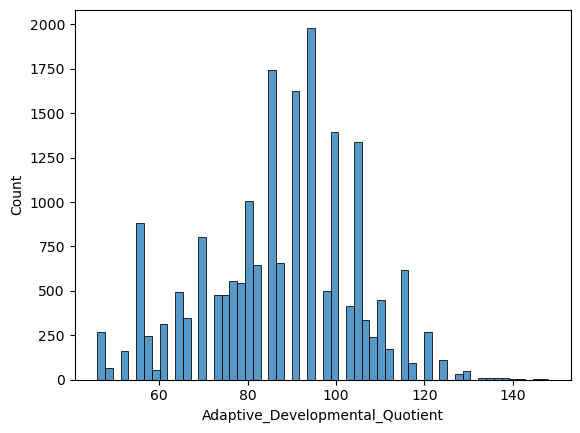

In [ ]:
sns.histplot(dataset,
                 x = dataset_clean['Adaptive_Developmental_Quotient'])

<Axes: xlabel='Motor_Developmental_Quotient', ylabel='Count'>

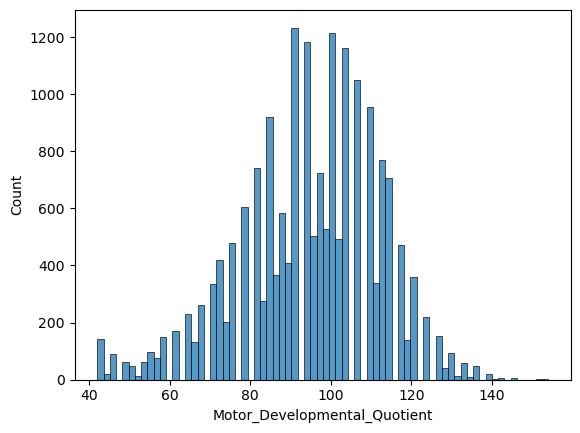

In [ ]:
sns.histplot(dataset,
                 x = dataset_clean['Motor_Developmental_Quotient'])

<Axes: xlabel='Cognitive_Developmental_Quotient', ylabel='Count'>

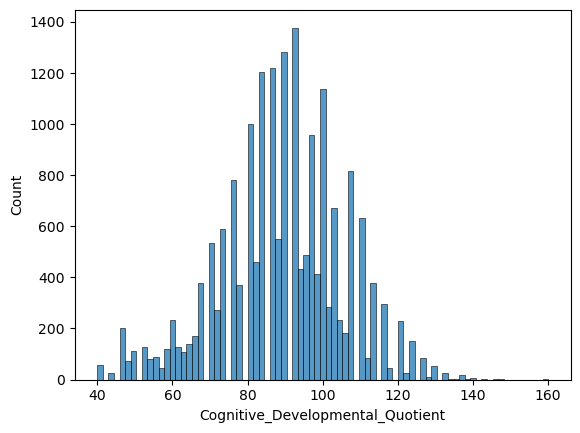

In [ ]:
sns.histplot(dataset,
                 x = dataset_clean['Cognitive_Developmental_Quotient'])

<Axes: xlabel='Communication_Developmental_Quotient', ylabel='Count'>

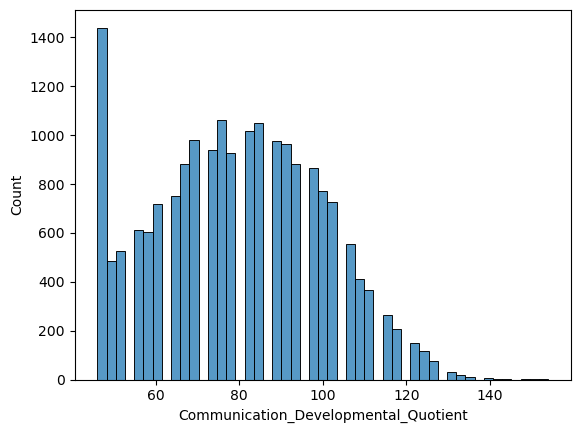

In [ ]:
sns.histplot(dataset,
                 x = dataset_clean['Communication_Developmental_Quotient'])

<Axes: xlabel='Social_Emotional_Developmental_Quotient', ylabel='Count'>

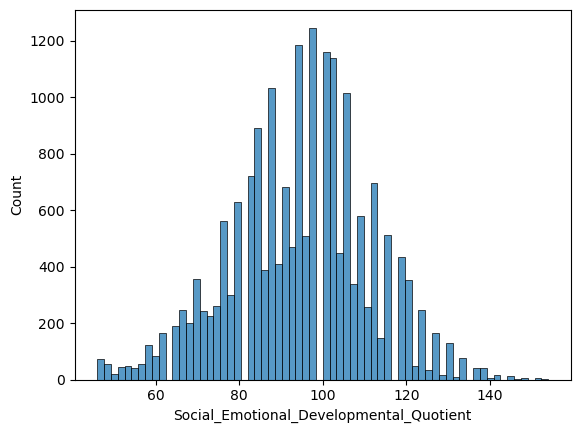

In [ ]:
sns.histplot(dataset,
                 x = dataset_clean['Social_Emotional_Developmental_Quotient'])

<Axes: xlabel='BDI_3_Total_Developmental_Quotient', ylabel='Count'>

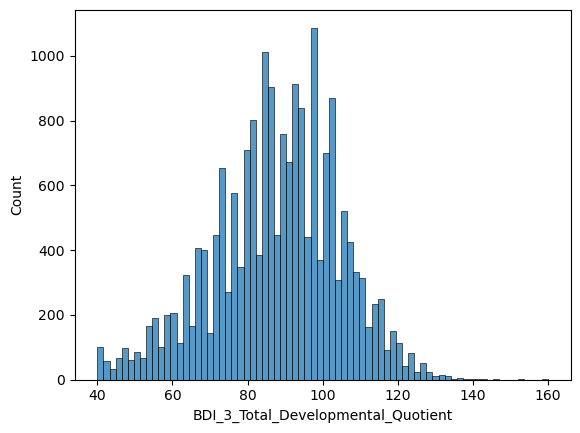

In [ ]:
sns.histplot(dataset,
                 x = dataset_clean['BDI_3_Total_Developmental_Quotient'])

3. Is there a pattern of significant differences in children's scores in the sub-domains within a domain? For example, a gap between a child's expressive (talking) and receptive (understanding) language scores may indicate that additional evaluation is needed for that child's eligibility. A gap between these sub-domains for all or most children may indicate the BDI-3 tool may lack sensitivity in the language domain.

4. Does the child's age seem to impact their scoring?

5. Eligibility is currently based on domains. A child would be considered eligible based on a 40% delay in one area or 25% delay in two areas, as determined by Development Quotient (DQ) scores. A DQ of 70 or less indicates a 40% delay, and a DQ between 71 and 78 indicates a 25% delay. If TEIS added an option for eligibility based on the total score on the BDI-3 total score (DQ score of 70 or less), are there any children who would have qualified that did not qualify based on the current method?

6. Is there any difference in scoring noted based on evaluation type?

8. Is there any notable pattern of scoring by evaluator?

Stretch Goal:
* Investigate the records that are missing ID values. Have they gotten better or worse over time? Are there repeat offenders?
* As noted above, this evaluation may be repeated every 4 months. How often did it occur that a child was assessed multiple times in a time period of less than 120 days. Has this gotten better or worse over time?


(question: does "better or worse" mean that more repeat testing is better?)